# Imports 

In [1]:
#%pip install ipympl
import functools

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
import glob
import h5py
from matplotlib import rc
rc("animation", html = "html5")

In [21]:
class GALINDA(object):
    """
    Galinda is a tool for baddies who wish to animate n-body and hydrodynamical simulations.
    
    Args: path (string): File path to a folder of data to animate (files should be hdf5)
          key (string): Data source to be plotted (header of hdf5 file) 
          ind (array): 2D array/list/tuple containing which indices the GALINDA will plot over 

    Attrs: fnames (array): A numpy array of filenames to animate
           key (string): Data source to be plotted (header of hdf5 file) 
           ind (array): 2D array/list/tuple containing which indices the GALINDA will plot over
    """

    def __init__(self,path,key,ind = [0,1]):
        self.path = path
        if "*" not in self.path:
            self.path += "*"
            
        self.fnames = glob.glob(path + "*")
        self.key = key
        self.ind = ind 

        
    def histogram(self):
        """
        Creates attributes for 2D histograms
        
        Attrs: to_plot (array): Array of values to plot
               binX (array): Histogram's x-values for bins
               binY (array): Histogram's y-values for bins
            
        """
        self.to_plot,self.binX,self.binY = np.histogram2d(self.x,self.y, bins = self.bins)
        
        
    def plot(self,i):
        """
        Function that plots a 2D histogram of data values
        
        Args: i (int): The index for which timestep to plot
        
        Attrs: f (h5py directory): An h5py directory of all the data in the i-th timestep
               data (array): Data to be plotted
               x (array): The x values of the simulation
               y (array): The y values of the simulation
               bins (array): The number of bins to put the data into (for a size N array, we have round(sqrt(N))/2)
               
        """
        self.f = h5py.File(self.fnames[i])
        self.data = np.array(self.f[self.key])
        self.x,self.y = self.data[:,self.ind[0]], self.data[:,self.ind[1]]
        self.bins = int(np.sqrt(len(self.x))/2)
        self.histogram()
        
        if i == 0:
            self.im = plt.imshow(self.to_plot)
        else:
            self.im.set_data(self.to_plot)
    
    def animate(self,figsize = (8,8)):
        """
        Animation!
        
        Args: figsize (tuple): How big to make the images
        
        Attrs: fig (Figure): The figure to animate on
               ax (Axes): The axes to animate on
               ani (Animation): The animation itself
        """
       # print(figsize)
        self.fig, self.ax = plt.subplots(figsize = figsize)
        self.ani = animation.FuncAnimation(self.fig, self.plot, np.arange(len(self.fnames)))
        

# GALINDA tests

In [22]:
gal = GALINDA("animation_data/", "m11h_star_coordinates")

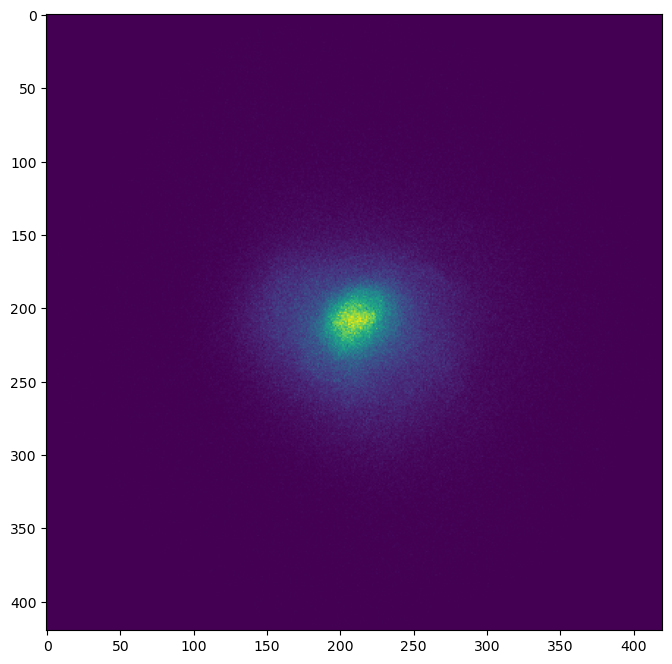

In [23]:
gal.animate()

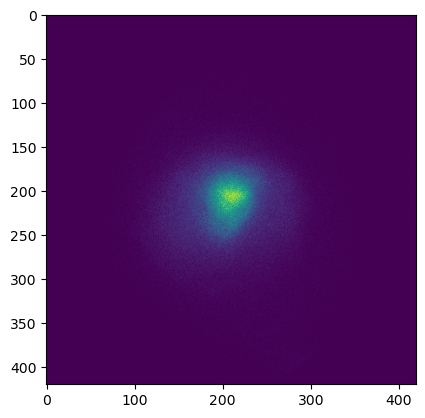

In [24]:
gal.ani

# Random Tests

In [8]:
glob.glob("animation_data/*.hdf5")
"*" in "animation_data/*.hdf5"

True

In [10]:
f = h5py.File("animation_data/star_coord_581.hdf5", "r")

In [17]:
np.array(f["m11h_star_coordinates"])[:,0]

array([1.25135101, 1.26004507, 1.23061369, ..., 4.40513692, 4.44712767,
       4.46653473], shape=(706582,))

# Testing Animation

## Below is code to run animation in notebook

Possibly need to `conda install ffmpeg` in terminal

In [4]:
from matplotlib import rc
rc("animation", html = "html5")
#gal.ani